In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import casadi 


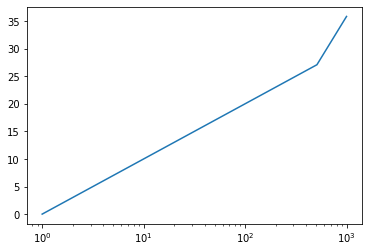

In [25]:

x = np.linspace(1,1000)

y = np.log10(x)*10 

indx = x > 500
y[indx] += 2*(y[indx] - y[indx][0])
plt.semilogx(x,y)


In [26]:

opti = casadi.Opti()

k = opti.variable()

yhat = k*np.log10(x)

J = 0
for i in range(len(y)):
    err = yhat[i] - y[i]
    J += err**2


opti.minimize(J)

opti.solver('ipopt')
sol = opti.solve()

k_opt = sol.value(k)
print(k_opt)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.8684339e+04 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

In [27]:
opti = casadi.Opti()

k = opti.variable()

yhat = k*np.log10(x)

J = 0
for i in range(len(y)):
    pot = np.log10(x[i]) + 1
    err = yhat[i] - y[i]
    J += 1/pot*err**2


opti.minimize(J)

opti.solver('ipopt')
sol = opti.solve()

k_opt = sol.value(k)
print(k_opt)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0473742e+04 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00 